Shaikh Amaan
2019BTECS00076
ASSIGNMENT 2 SET LAB


Linear Regression

In [44]:
# importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# reading dataset
dataset = pd.read_csv("/content/drive/My Drive/assignments/Setl/setl-assg-2.csv")

In [46]:
dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


In [47]:
#ignoring a few null values from the dataset.
dataset = dataset[~dataset['BMI'].isnull()] 
X = dataset.iloc[:, [0,8,3,6]].values #select SEX,BMI,AGE,CURSMOKE #,3,6
y = dataset.iloc[:, 4].values #select SYSBP

In [48]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X)

print( 'R-squared: %.2f' % regressor.score(X_test, y_test))
print (regressor.coef_)

R-squared: 0.65
[ 4.22345242 -0.96349582 17.38689608 -1.20994989]


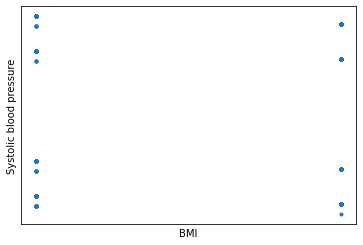

In [51]:
fig, ax = plt.subplots()
ax.set_xticks([18.5, 24.9, 29.9], minor=False) #important values of BMI
ax.set_yticks([120, 130, 140, 180], minor=False) #important values of SysBP
ax.xaxis.grid(True, which='major',linewidth='0.5', color='red')
ax.yaxis.grid(True, which='major',linewidth='0.5', color='blue')

plt.scatter(X[:,1], y_pred, marker='.')
plt.ylabel("Systolic blood pressure")
plt.xlabel("BMI")
plt.show()